In [1]:
import pandas as pd
import numpy as np

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv')
data.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
0,1,48,0,0,821,2,5.0,3.0,3.0,4.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,1
1,0,35,0,0,821,26,39.0,2.0,2.0,3.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,4
2,1,41,0,0,853,0,0.0,4.0,4.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,4
3,1,50,0,0,1905,0,0.0,2.0,2.0,3.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,4
4,0,49,0,0,3470,0,1.0,3.0,3.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,4


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119567 entries, 0 to 119566
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  119567 non-null  int64  
 1   Age                                     119567 non-null  int64  
 2   Type of Travel                          119567 non-null  int64  
 3   Class                                   119567 non-null  int64  
 4   Flight Distance                         119567 non-null  int64  
 5   Departure Delay                         119567 non-null  int64  
 6   Arrival Delay                           119567 non-null  float64
 7   Departure and Arrival Time Convenience  119567 non-null  float64
 8   Ease of Online Booking                  119567 non-null  float64
 9   Check-in Service                        119567 non-null  float64
 10  Online Boarding                         1195

In [3]:
data.describe()

,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
count,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,...,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000
mean,0.493188,39.858021,0.308538,0.587027,1223.933627,14.909532,15.237959,3.206838,2.879172,3.294747,...,3.386185,3.456221,3.380381,3.294053,3.213788,3.646399,2.817943,3.380423,3.637333,3.105062
std,0.499956,15.030382,0.461892,0.623920,999.732592,38.310203,38.637766,1.386886,1.298754,1.266249,...,1.285412,1.311765,1.295580,1.310393,1.324438,1.165786,1.253511,1.327173,1.167878,0.970545
min,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,28.000000,0.000000,0.000000,441.000000,0.000000,0.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
50%,0.000000,40.000000,0.000000,1.000000,868.000000,0.000000,0.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,1.000000,51.000000,1.000000,1.000000,1775.000000,13.000000,13.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,1.000000,85.000000,1.000000,2.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [4]:
data['Class'].value_counts()

,count
Class,
0,58157
1,52631
2,8779


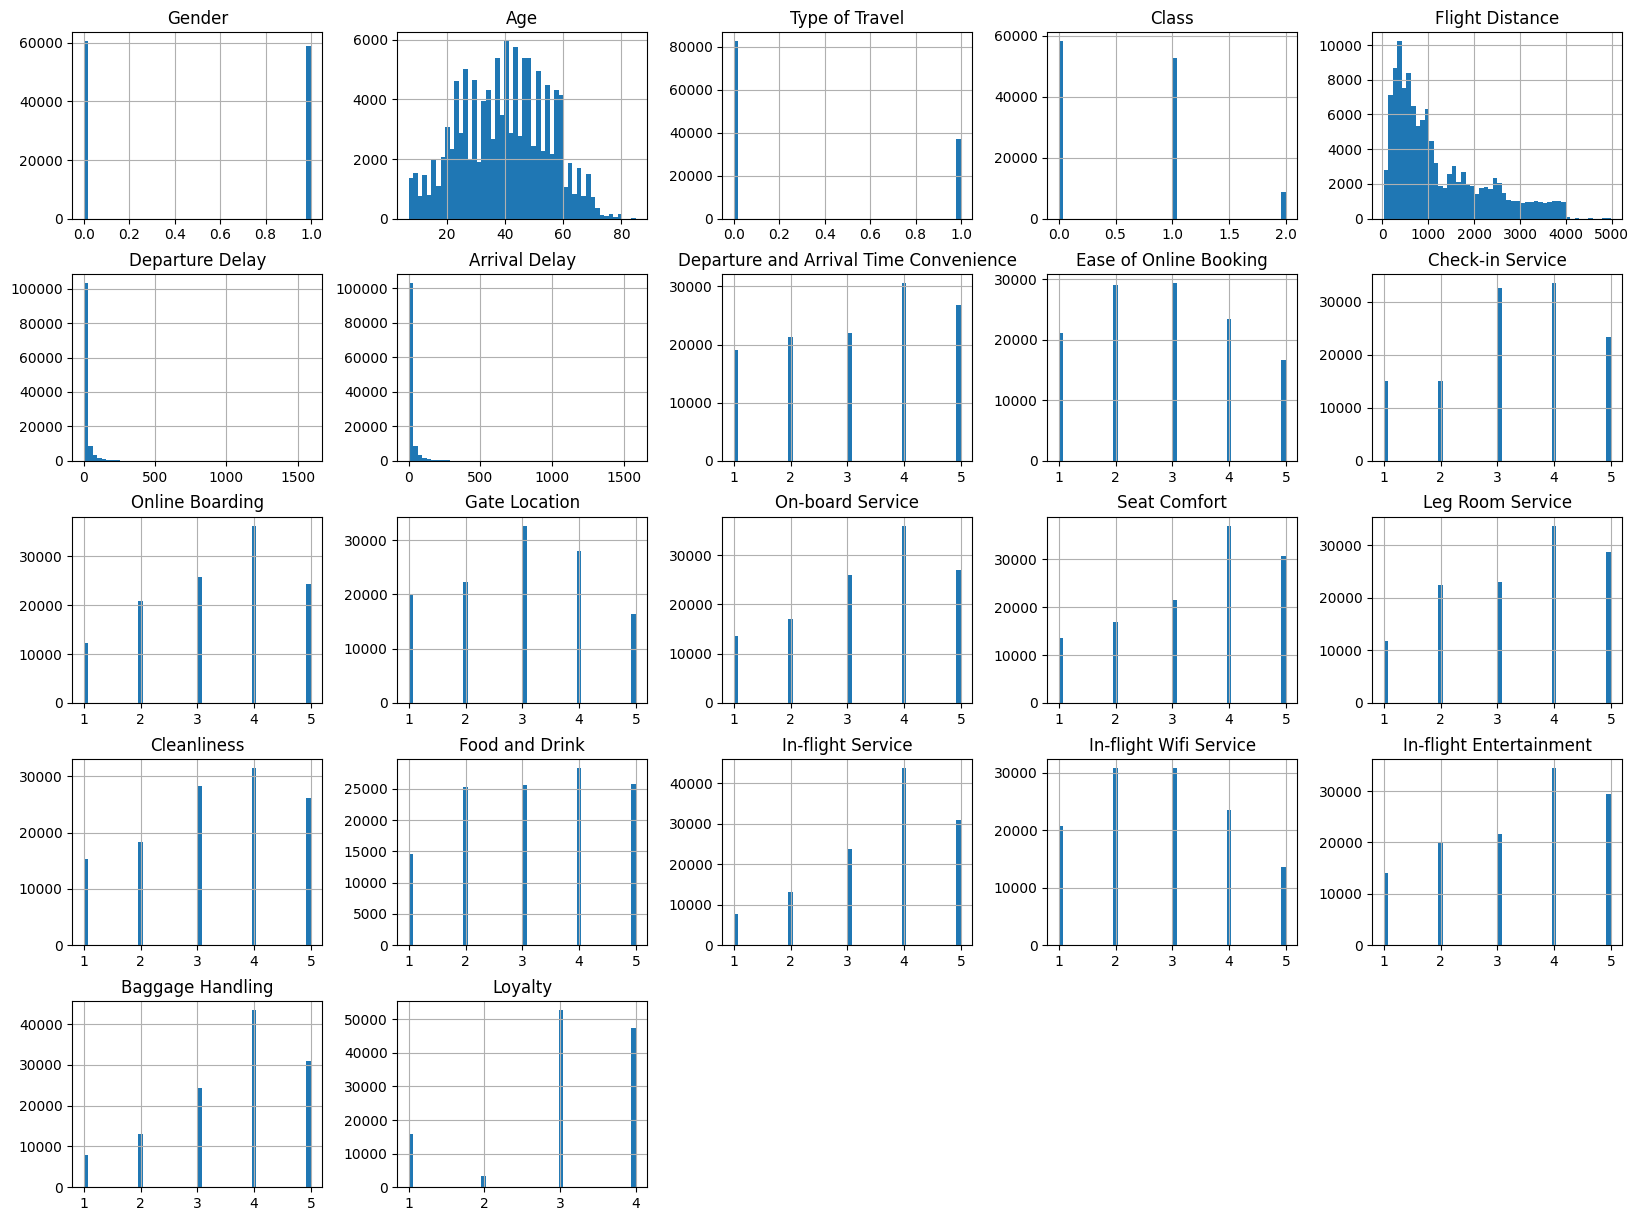

In [5]:
data.hist(bins=50, figsize=(20,15))
plt.show()

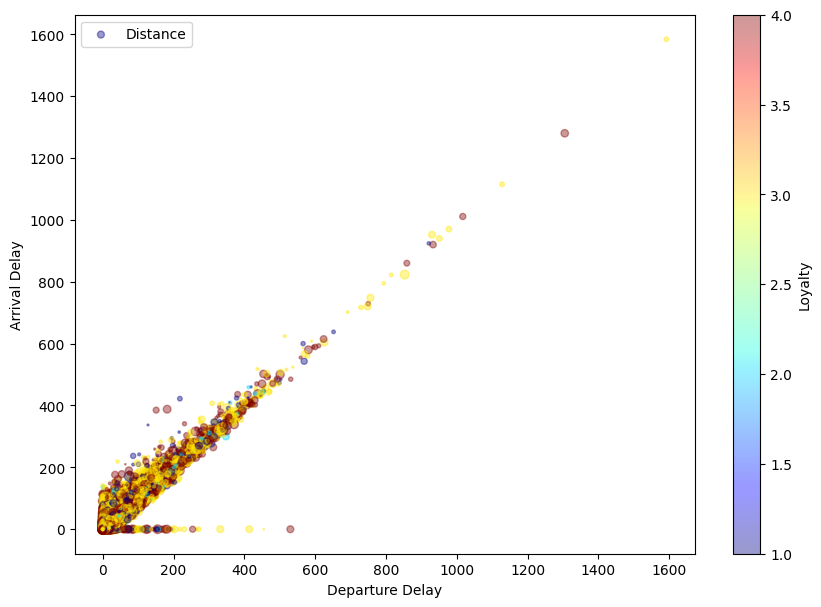

In [8]:
data.plot(kind="scatter", x="Departure Delay", y="Arrival Delay", alpha=0.4,
    s=data["Flight Distance"]/100, label="Distance", figsize=(10,7),
    c="Loyalty", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [9]:
import seaborn as sns

# Check for unique values in categorical columns to understand distributions
categorical_columns = ['Gender',  'Type of Travel', 'Class']
for col in categorical_columns:
    print(f"{col} unique values:\n", data[col].value_counts(), "\n")


Gender unique values:
 Gender
0    60598
1    58969
Name: count, dtype: int64 

Type of Travel unique values:
 Type of Travel
0    82676
1    36891
Name: count, dtype: int64 

Class unique values:
 Class
0    58157
1    52631
2     8779
Name: count, dtype: int64 



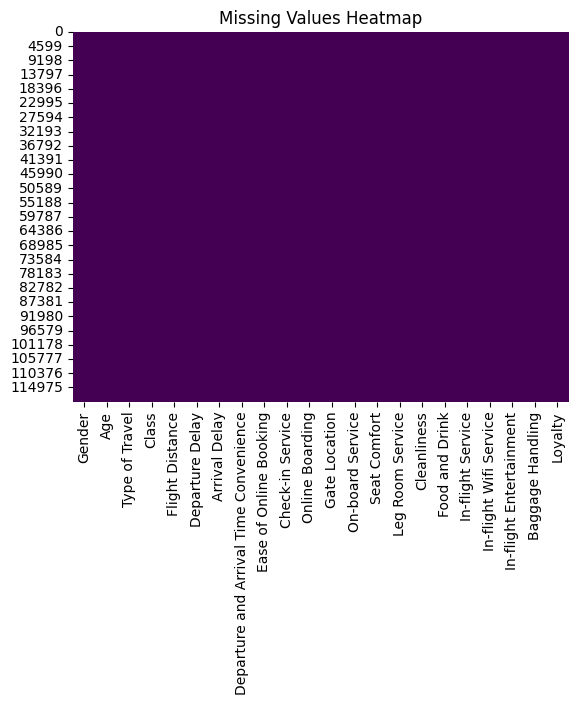

In [10]:
# Replace '0' values with NaN in satisfaction-related columns, as 0 indicates a null/missing survey response.
survey_columns = [
     'Departure and Arrival Time Convenience',
    'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location',
    'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
    'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
    'In-flight Entertainment', 'Baggage Handling'
]
data[survey_columns] = data[survey_columns].replace(0, np.nan)

# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
# Check percentage of missing values
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values:\n", missing_percentage)

# Impute missing values based on context:
# - Median for numeric columns
# - Mode for categorical columns
data = data.dropna(subset=survey_columns)

# Impute missing values: Median for numeric columns, mode for categorical columns
for column in ['Departure Delay', 'Arrival Delay']:
    if data[column].isnull().sum() > 0:
        data[column] = data[column].fillna(data[column].median())

print("Null values are corrected \n")

Percentage of missing values:
 Gender                                    0.0
Age                                       0.0
Type of Travel                            0.0
Class                                     0.0
Flight Distance                           0.0
Departure Delay                           0.0
Arrival Delay                             0.0
Departure and Arrival Time Convenience    0.0
Ease of Online Booking                    0.0
Check-in Service                          0.0
Online Boarding                           0.0
Gate Location                             0.0
On-board Service                          0.0
Seat Comfort                              0.0
Leg Room Service                          0.0
Cleanliness                               0.0
Food and Drink                            0.0
In-flight Service                         0.0
In-flight Wifi Service                    0.0
In-flight Entertainment                   0.0
Baggage Handling                          0.0
Loy

In [12]:
# Check the percentage of missing values after correction
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values:\n", missing_percentage)

data['Loyalty'].value_counts()

Percentage of missing values:
 Gender                                    0.0
Age                                       0.0
Type of Travel                            0.0
Class                                     0.0
Flight Distance                           0.0
Departure Delay                           0.0
Arrival Delay                             0.0
Departure and Arrival Time Convenience    0.0
Ease of Online Booking                    0.0
Check-in Service                          0.0
Online Boarding                           0.0
Gate Location                             0.0
On-board Service                          0.0
Seat Comfort                              0.0
Leg Room Service                          0.0
Cleanliness                               0.0
Food and Drink                            0.0
In-flight Service                         0.0
In-flight Wifi Service                    0.0
In-flight Entertainment                   0.0
Baggage Handling                          0.0
Loy

,count
Loyalty,
3,52808
4,47525
1,15729
2,3505


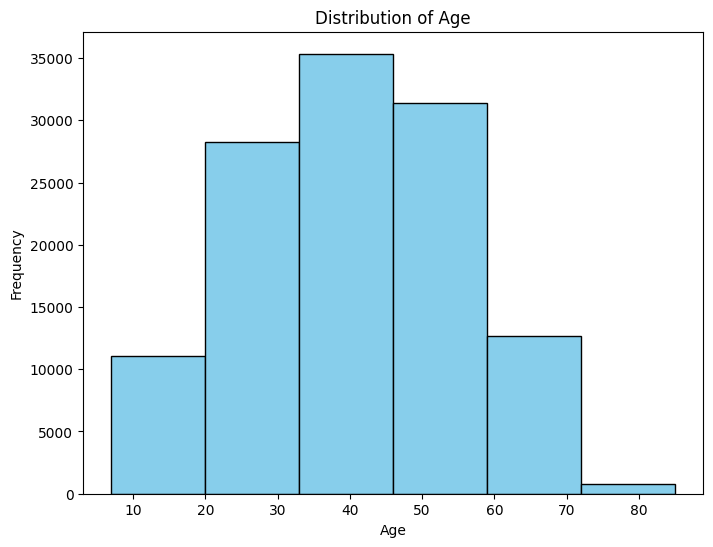

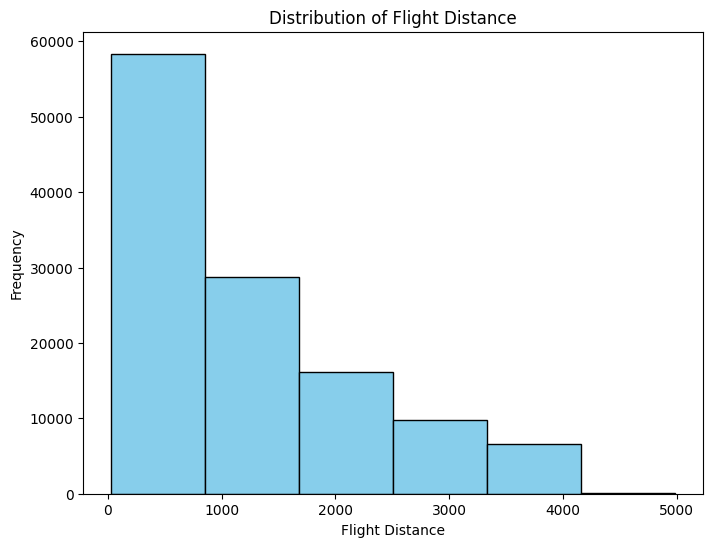

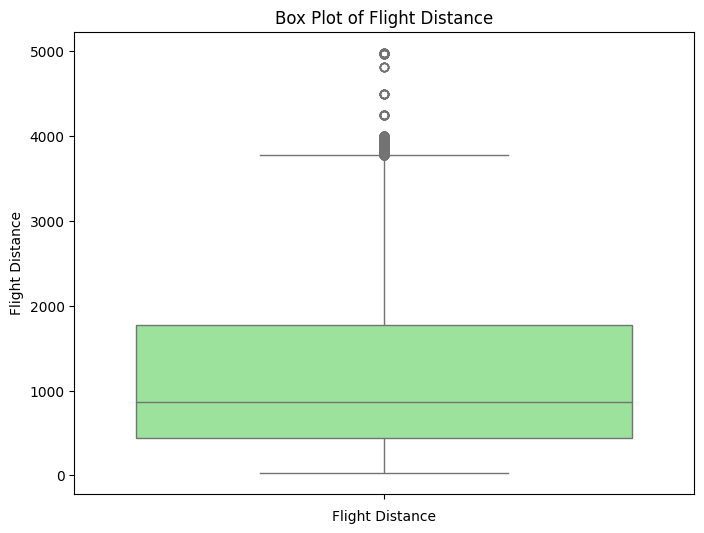

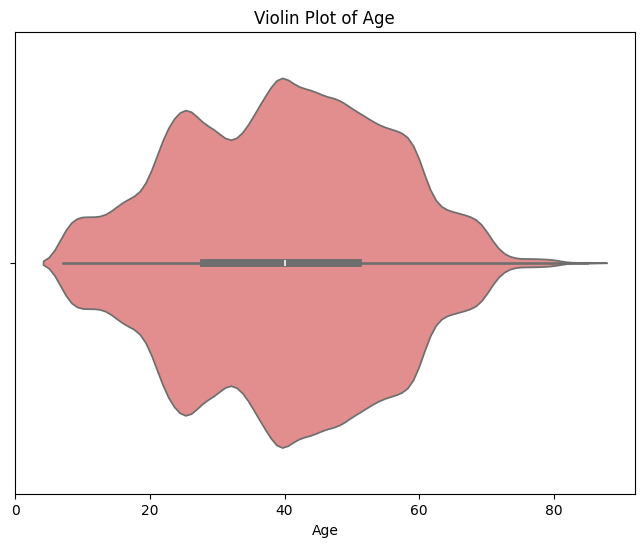

In [13]:

# Visualizing the distribution of a continuous feature, e.g., 'Age'
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=6, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of a continuous feature, e.g., 'Age'
plt.figure(figsize=(8, 6))
plt.hist(data['Flight Distance'], bins=6, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

# Box plot of a feature 'Flight Distance'  Box plots can reveal outliers and distribution spread. They are helpful for understanding how data values are dispersed across quartiles.
plt.figure(figsize=(8, 6))
sns.boxplot(data['Flight Distance'], color='lightgreen')
plt.title('Box Plot of Flight Distance')
plt.xlabel('Flight Distance')
plt.show()


# Violin plot for Age Violin plots combine a box plot with a kernel density plot, which is helpful for observing the distribution, especially if it’s multimodal (has multiple peaks).
plt.figure(figsize=(8, 6))
sns.violinplot(x=data['Age'], color='lightcoral')
plt.title('Violin Plot of Age')
plt.xlabel('Age')
plt.show()





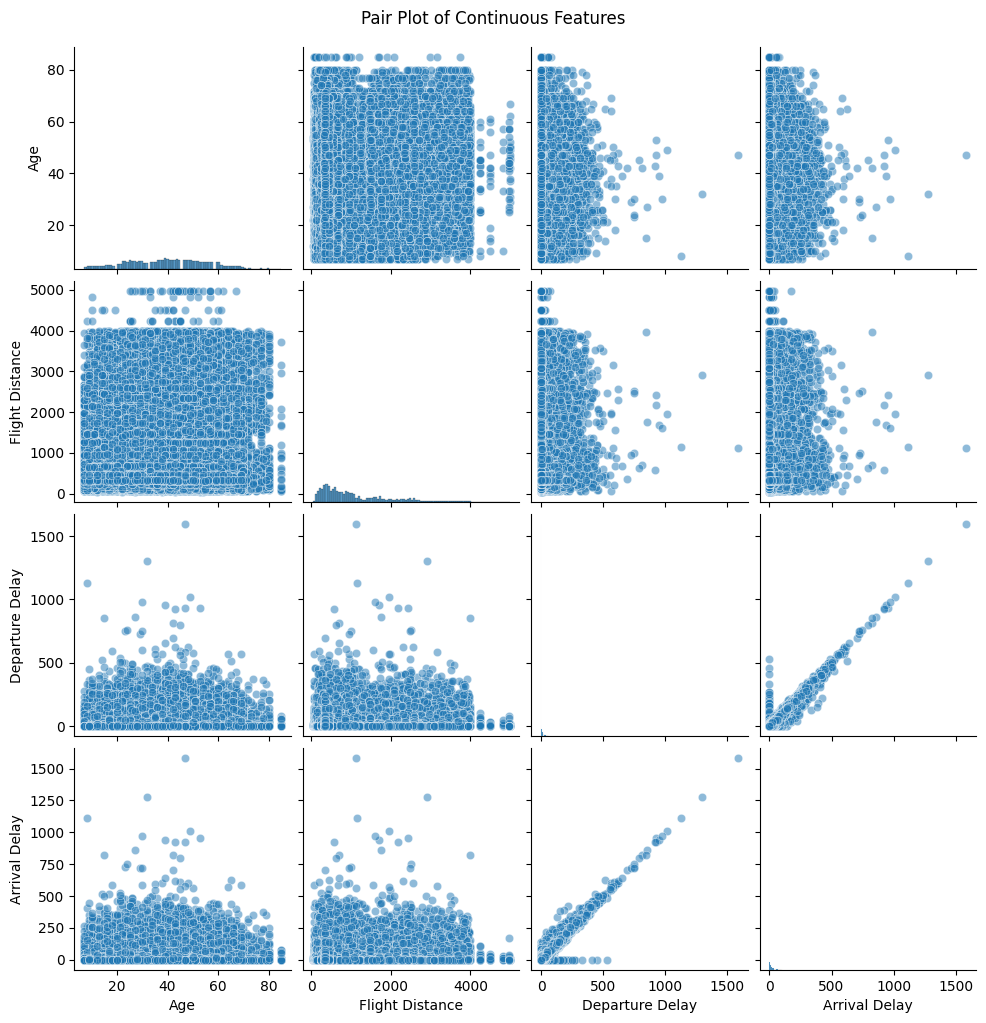

In [14]:
# Pair Plot  If you want to examine multiple features before splitting, a pair plot is a good choice as it shows pairwise relationships and distribution for each feature.


# Subset of continuous variables for pair plot
continuous_features = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

sns.pairplot(data[continuous_features], diag_kind='hist', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Continuous Features', y=1.02)
plt.show()

In [15]:
#Encoding data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# One-hot encoding - Not going with this as its not helping in correlation and ANN
#data_encoded_1 = pd.get_dummies(data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'])
# Encoding for all the category columns to ensure that all numbers taken up for maching learning

data.loc[:, categorical_columns] = data[categorical_columns].apply(le.fit_transform)
#categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']


data.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
0,1,48,0,0,821,2,5.0,3.0,3.0,4.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,1
1,0,35,0,0,821,26,39.0,2.0,2.0,3.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,4
2,1,41,0,0,853,0,0.0,4.0,4.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,4
3,1,50,0,0,1905,0,0.0,2.0,2.0,3.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,4
4,0,49,0,0,3470,0,1.0,3.0,3.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,4


Data types of each column:
 Gender                                      int64
Age                                         int64
Type of Travel                              int64
Class                                       int64
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience    float64
Ease of Online Booking                    float64
Check-in Service                          float64
Online Boarding                           float64
Gate Location                             float64
On-board Service                          float64
Seat Comfort                              float64
Leg Room Service                          float64
Cleanliness                               float64
Food and Drink                            float64
In-flight Service                         float64
In-flight Wifi Service                    float64
In-flight Entertainmen

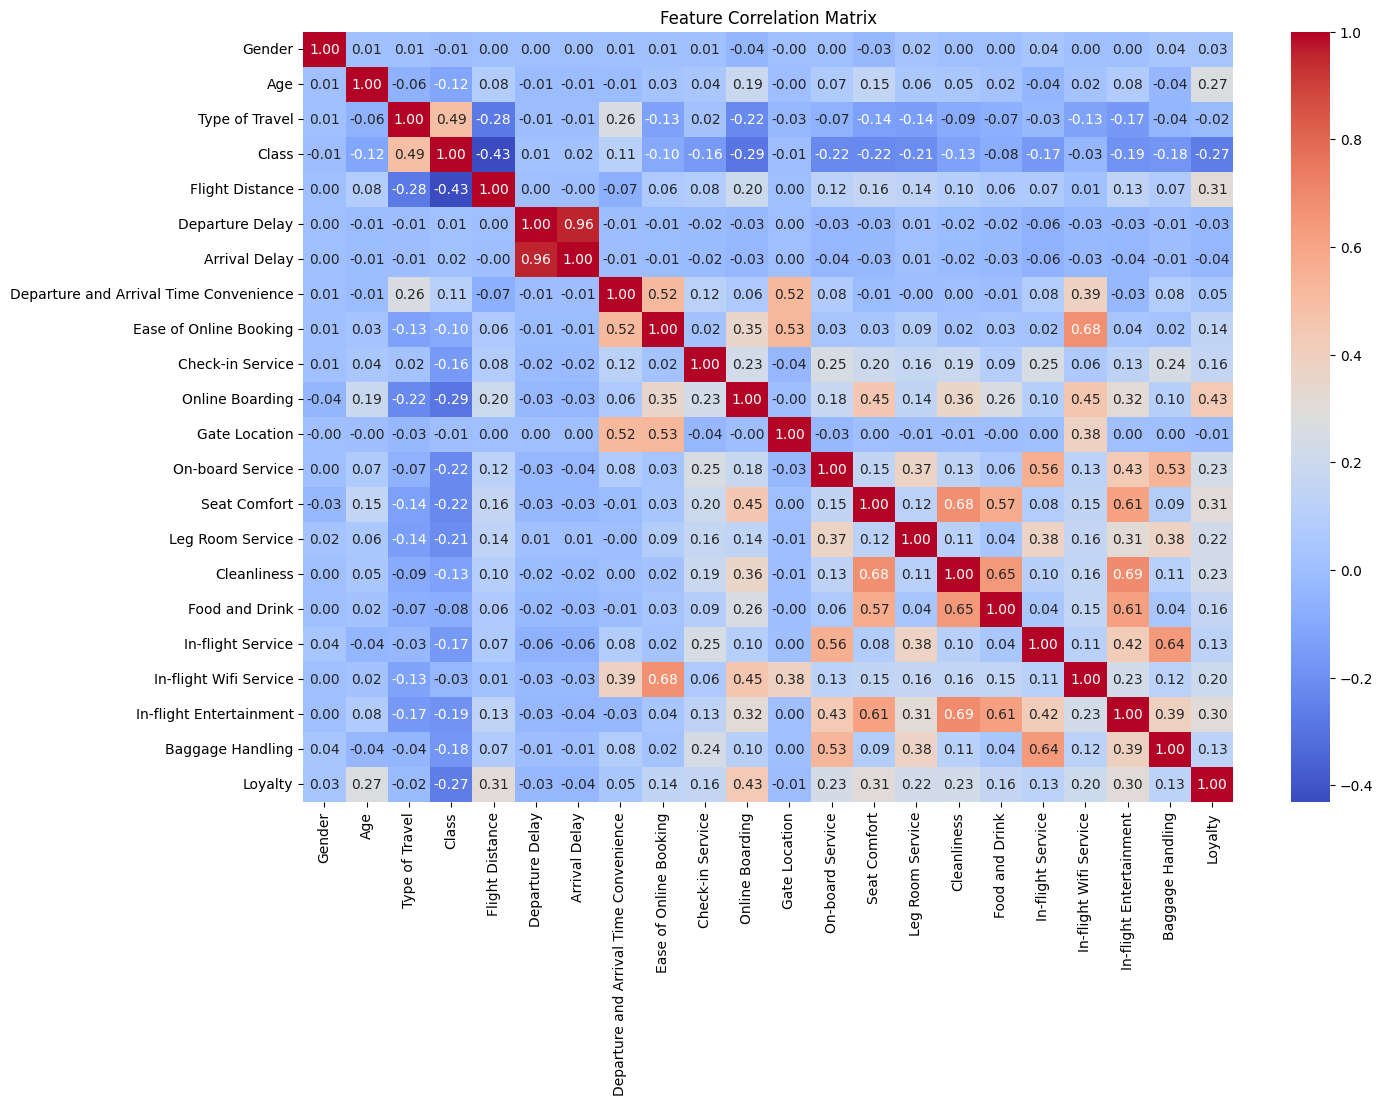

In [16]:
print("Data types of each column:\n", data.dtypes)

# 2. Select only numeric columns
numeric_data = data

# 3. Calculate and plot the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [17]:
data.head()


# Recalculate the correlation matrix
corr_matrix = data.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)


Loyalty                                   1.000000
Online Boarding                           0.433505
Flight Distance                           0.311779
Seat Comfort                              0.305828
In-flight Entertainment                   0.304616
Age                                       0.269590
Class                                     0.266307
On-board Service                          0.229805
Cleanliness                               0.227971
Leg Room Service                          0.218429
In-flight Wifi Service                    0.203990
Food and Drink                            0.158994
Check-in Service                          0.157433
Ease of Online Booking                    0.143225
Baggage Handling                          0.127392
In-flight Service                         0.126431
Departure and Arrival Time Convenience    0.048320
Arrival Delay                             0.038125
Departure Delay                           0.033670
Gender                         

In [18]:
# Get unique classes in "Loyalty"
classes = data['Loyalty'].unique()

# Store correlations for each class
correlations_by_class = {}

for cls in classes:
    # Create binary labels
    binary_loyalty = (data['Loyalty'] == cls).astype(int)

    # Replace the "Loyalty" column with binary labels temporarily
    data['Binary_Loyalty'] = binary_loyalty

    # Calculate correlation matrix
    corr_matrix = data.corr()

    # Get correlations with the binary "Loyalty"
    loyalty_correlations = corr_matrix["Binary_Loyalty"].drop('Binary_Loyalty')  # Exclude self-correlation

    # Convert to absolute values and sort
    sorted_correlations = loyalty_correlations.abs().sort_values(ascending=False)

    # Store the sorted correlations
    correlations_by_class[cls] = sorted_correlations

# Print correlations for each class
for cls, correlations in correlations_by_class.items():
    print(f"\nTop Correlated Features for Class {cls}:\n{correlations}")



Top Correlated Features for Class 1:
Loyalty                                   0.844157
Online Boarding                           0.269013
Type of Travel                            0.251678
Age                                       0.221980
Flight Distance                           0.184140
Departure and Arrival Time Convenience    0.167538
Seat Comfort                              0.135889
Ease of Online Booking                    0.134995
In-flight Wifi Service                    0.126225
In-flight Entertainment                   0.099890
On-board Service                          0.098316
Class                                     0.082478
Check-in Service                          0.076916
Cleanliness                               0.072249
Leg Room Service                          0.063466
Food and Drink                            0.057014
Gender                                    0.031297
Gate Location                             0.022410
In-flight Service                         0.

In [19]:
import pandas as pd

# Define top features for each class, now including Class 4
top_features = {
    "Class 1": {
        "top_2": ["Online Boarding", "Type of Travel"],
        "top_5": ["Online Boarding", "Type of Travel", "Age", "Flight Distance", "Departure and Arrival Time Convenience"],
        "top_10": ["Online Boarding", "Type of Travel", "Age", "Flight Distance", "Departure and Arrival Time Convenience",
                   "Seat Comfort", "Ease of Online Booking", "In-flight Wifi Service", "In-flight Entertainment", "On-board Service"]
    },
    "Class 2": {
        "top_2": ["In-flight Wifi Service", "Ease of Online Booking"],
        "top_5": ["In-flight Wifi Service", "Ease of Online Booking", "Online Boarding", "Type of Travel", "Departure and Arrival Time Convenience"],
        "top_10": ["In-flight Wifi Service", "Ease of Online Booking", "Online Boarding", "Type of Travel", "Departure and Arrival Time Convenience",
                   "Age", "Flight Distance", "Baggage Handling", "In-flight Service", "Class"]
    },
    "Class 3": {
        "top_2": ["Type of Travel", "Class"],
        "top_5": ["Type of Travel", "Class", "Online Boarding", "In-flight Entertainment", "Leg Room Service"],
        "top_10": ["Type of Travel", "Class", "Online Boarding", "In-flight Entertainment", "Leg Room Service",
                   "In-flight Wifi Service", "Seat Comfort", "On-board Service", "Cleanliness", "Baggage Handling"]
    },
    "Class 4": {
        "top_2": ["Online Boarding", "In-flight Entertainment"],
        "top_5": ["Online Boarding", "In-flight Entertainment", "Class", "Type of Travel", "Seat Comfort"],
        "top_10": ["Online Boarding", "In-flight Entertainment", "Class", "Type of Travel", "Seat Comfort",
                   "Leg Room Service", "Cleanliness", "Flight Distance", "On-board Service", "In-flight Wifi Service"]
    }
}

# Create datasets and save them as CSV files
for dataset_name, num_features in zip(["Dataset_1", "Dataset_2", "Dataset_3"], [2, 5, 10]):
    dataset = pd.DataFrame()
    for class_name in top_features:
        features = top_features[class_name][f"top_{num_features}"]
        # Ensure no duplicate columns when combining
        dataset = pd.concat([dataset, data[features]], axis=1)

    # Add 'Loyalty' column to each dataset
    dataset['Loyalty'] = data['Loyalty']

    # Remove duplicate columns
    dataset = dataset.loc[:, ~dataset.columns.duplicated()]

    # Save each dataset as a CSV file
    dataset.to_csv(f'{dataset_name}.csv', index=False)

    # Print confirmation
    print(f"{dataset_name} has been saved as CSV.")


Dataset_1 has been saved as CSV.
Dataset_2 has been saved as CSV.
Dataset_3 has been saved as CSV.


[0.00891984 0.0353868  0.20110207 0.06075228 0.03202445 0.01213371
 0.01229725 0.03016697 0.04051818 0.02538417 0.1071915  0.03904811
 0.03597661 0.04584277 0.03573934 0.03429466 0.01993503 0.0328587
 0.0908625  0.0657223  0.03384276]


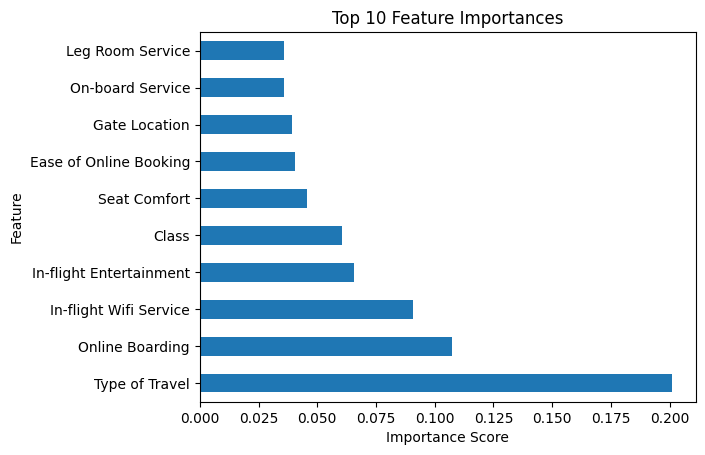

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# Selecting independent variables (X) and target variable (y)
# Dropping non-numeric and irrelevant columns for modeling
X = data.select_dtypes(include=[np.number]).drop(columns=["Loyalty"])
y = data["Loyalty"]  # Target column

# Filling missing values with 0
X = X.fillna(0)
y = y.fillna(0)

# Train ExtraTreesClassifie
model = ExtraTreesClassifier()
model.fit(X, y)

# Print feature importances
print(model.feature_importances_)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()